# Load packages

In [1]:
import DrivAER as dv
import pandas as pd
import numpy as np
import scanpy as sc

## Erythrocyte trajectory

In [15]:
count1 = sc.read("DrivAER/data/Paul_Ery.txt",sep="\t",first_column_names=True,cache=True)
pt1 = pd.to_numeric(count1.obs_names)
C3_mouse = dv.get_anno(filename="C3.gmt",transfer=True)

In [21]:
res1 = dv.calc_relevance(count = count1, pheno = pt1, tf_targets = C3_mouse[["GATAAGR_GATA_C","GATA_C", "GATA_Q6", "PU1_Q6"]], 
                           min_targets=5, datatype = "continuous")

13 / 4
dca: Successfully preprocessed 32 genes and 1254 cells.
dca: Calculating low dimensional representations...
14 / 4
dca: Successfully preprocessed 22 genes and 1254 cells.
dca: Calculating low dimensional representations...
15 / 4
dca: Successfully preprocessed 19 genes and 1254 cells.
dca: Calculating low dimensional representations...
16 / 4
dca: Successfully preprocessed 27 genes and 1254 cells.
dca: Calculating low dimensional representations...


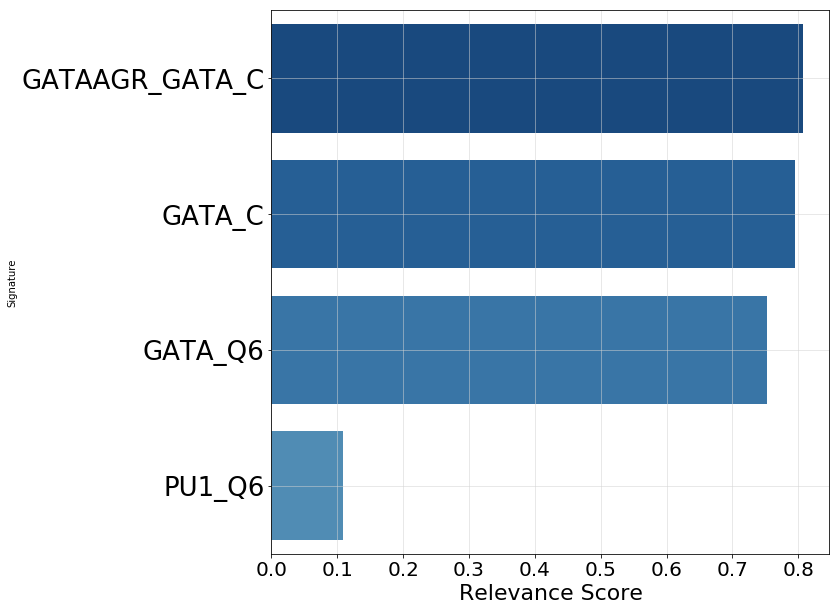

Top_TF : ['GATAAGR_GATA_C', 'GATA_C', 'GATA_Q6', 'PU1_Q6']
Worse_TF : ['GATAAGR_GATA_C', 'GATA_C', 'GATA_Q6', 'PU1_Q6']


In [22]:
dv.rank_plot(result=res1,save=False)

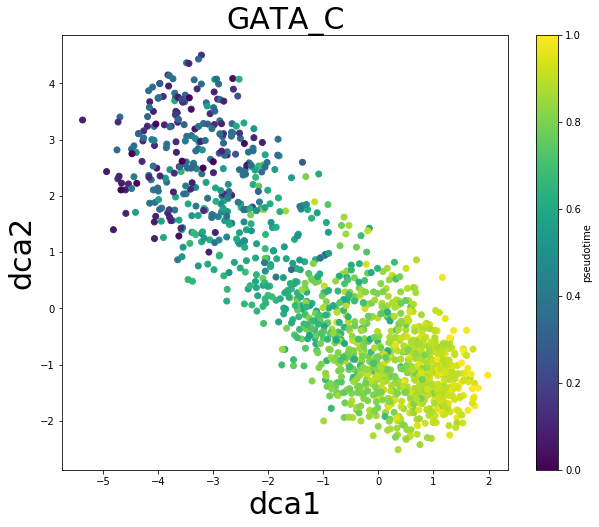

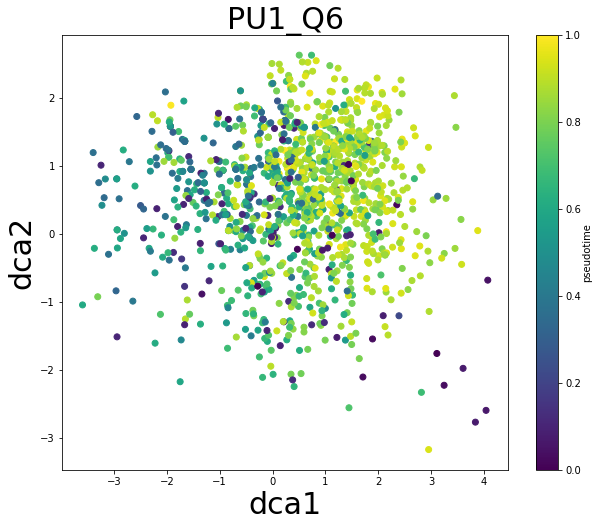

In [23]:
dv.embedding_plot(result=res1, tf_name="GATA_C", pheno=pt1, datatype="continuous", save=False)
dv.embedding_plot(result=res1, tf_name="PU1_Q6", pheno=pt1, datatype="continuous", save=False)

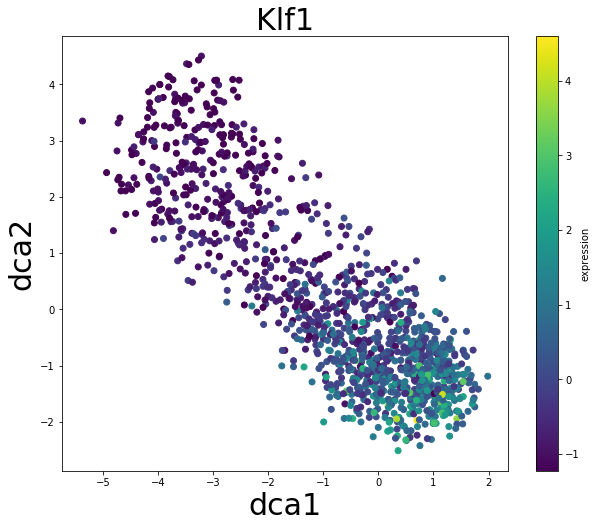

In [31]:
gene_plot(result=res1, tf_name="GATA_C", gene="Klf1", count=count1, save=False)

In [30]:
import scanpy as sc
import pandas as pd
import os
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def gene_plot(result, tf_name, gene, count, save):
    embedding = result[0][tf_name]
    plt.figure(figsize=(10,8))
    plt.title(gene,fontsize=30)
    plt.xlabel("dca1",fontsize=30)
    plt.ylabel("dca2",fontsize=30)
    sc.pp.scale(count)
    plt.scatter(embedding[:, 0], embedding[:, 1],c = count[:,gene].X)
    cbar = plt.colorbar()
    cbar.set_label("expression", labelpad=+1)
    fig = plt.gcf()
    plt.show()
    if save:
        fig.savefig(path + gene + '.svg', bbox_inches='tight')


In [24]:
C3_mouse["GATA_C"]

['Gdf3',
 'Adora3',
 'C5orf64',
 'Masp1',
 'Ube2f',
 'Ccser2',
 'Edn1',
 'Rorb',
 'Syt7',
 'Cited4',
 'Slc35a2',
 'Aqp2',
 'Hemgn',
 'Bdnf',
 'Dspp',
 'Ddx17',
 'Lcat',
 'Pla2g1b',
 'Pls1',
 'Psma8',
 'Guca2a',
 'Rarb',
 'Map2k5',
 'Phox2a',
 'Cntln',
 'Gatm',
 'Anks1b',
 'Nol4l',
 'Matn1',
 'Lifr',
 'Zhx3',
 'Tsku',
 'Pkhd1l1',
 'Luc7l3',
 'Srsf2',
 'Linc01555',
 'Pcyt2',
 'Colq',
 'Cd34',
 'Jun',
 'Rhce',
 'Fbxl7',
 'Plekhg6',
 'Ppt2',
 'Arf6',
 'Krt20',
 'Chchd7',
 'Ackr1',
 'Ybx1',
 'Apool',
 'Lyl1',
 'Dmd',
 'Nectin2',
 'Upk1b',
 'Arap2',
 'Hnf1a',
 'Slc46a1',
 'Plag1',
 'Klf12',
 'Il1rl1',
 'Rspo2',
 'Esrrg',
 'Alms1',
 'Klf14',
 'En1',
 'Kcnk3',
 'Krt73',
 'Atp2a3',
 'Echdc2',
 'Supt16h',
 'H3f3a',
 'Heph',
 'Fcgbp',
 'Znf219',
 'Bmp6',
 'Pdzd2',
 'Msr1',
 'Znf385b',
 'Mitf',
 'Sptssb',
 'Mecom',
 'Gfi1b',
 'C5orf30',
 'Sertad4',
 'Zbtb20',
 'Angpt2',
 'Usp15',
 'Hyal3',
 'Gse1',
 'Pcdh11y',
 'Pcdh11x',
 'Ptf1a',
 'Linc00670',
 'Mbd1',
 'Klhdc3',
 'Ambn',
 'Slc26a7',
 'C12orf42'